This example aims to have two target orbits, and one observer orbit. The observer is tasked with monitoring the two targets to minimize the trace covariance of the state over the simulation horizon. We use a PPO agent that is rewarded for minimizing the trace covariance of the target states to the best of its ability.

In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import dill
import numpy as np

import matplotlib.pyplot as plt

from data_util.target_generation import TargetGenerator



In [2]:
# mass parameter of earth-moon system
mu = 1.215058560962404e-02
# apparent magnitude of sun
ms = -26.4
# specular reflection coefficient
aspec = 0
# diffuse reflection coefficient
adiff = 0.2
# diameter of target (LU)
d = 0.001 / 384400
# earth radius (LU)
rearth = 6371 / 384400
# moon radius (LU)
rmoon = 1737.4 / 384400

params = {
    "mu":mu,
    "ms":ms,
    "aspec":aspec,
    "adiff":adiff,
    "d":d,
    "rearth":rearth,
    "rmoon":rmoon
}

# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])



In [3]:
tg = TargetGenerator([x0_1, x0_2, x0_3], periods=[3.225, 3.225, 6.45])

In [4]:
choice = 0
data = tg.gen_state_history(choice, n_points=200)

In [5]:
L2_spl = tg.make_spline(data)

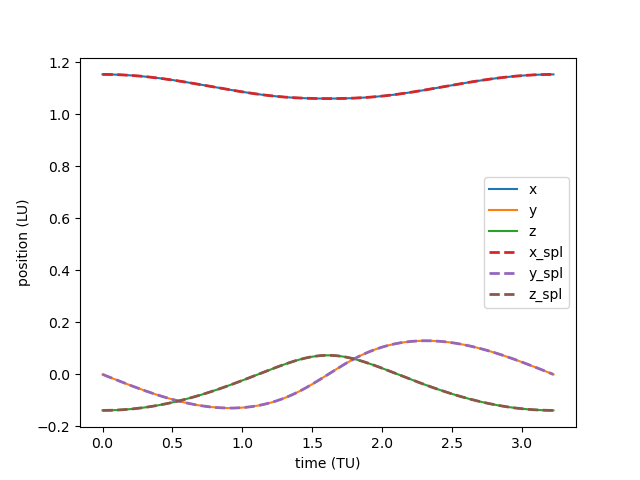

In [6]:
tt = np.linspace(0, tg.periods[choice], 300)
data_spl = L2_spl(tt)

plt.figure(6)
plt.clf()
plt.xlabel("time (TU)")
plt.ylabel("position (LU)")
plt.plot(data[:, 0], data[:, 1:4], label = ["x", "y", "z"])
plt.plot(tt, data_spl, label = ["x_spl", "y_spl", "z_spl"], linestyle = "--", linewidth = 2.0)
plt.legend()
plt.show()

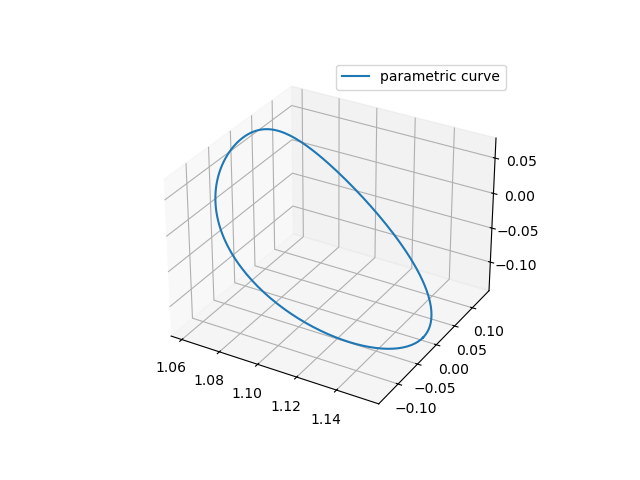

In [7]:
ax = plt.figure(7).add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(data[:, 1], data[:, 2], data[:, 3], label='parametric curve')
ax.legend()

plt.show()

In [8]:
dill.dump(L2_spl, file = open("../data/splines/L2_spl.pickle", "wb"))
del L2_spl

In [10]:
L2_spl = dill.load(open("../data/splines/L2_spl.pickle", "rb"))